In [ ]:
# Verify the probability distribution for the time between counts for the Geiger counter data from 2024-02-06

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# read Geiger counter data in, skipping bad first few rows, and specifying column labels
# data is the count number, and time of count in ms
df = pd.read_csv("counts.csv",skiprows=29,names=["count", "time_ms"])

In [3]:
t_s = df["time_ms"].to_numpy()/1000
cs = df["count"].to_numpy()
max_t_s = t_s[-1]

In [4]:
# estimate the counting rate:
R = cs[-1] / t_s[-1]
print(f"{R=}")

R=1.8737818352412368


In [5]:
tb_s = t_s[1:]-t_s[0:-1]

Text(0, 0.5, 'probability density (1/s)')

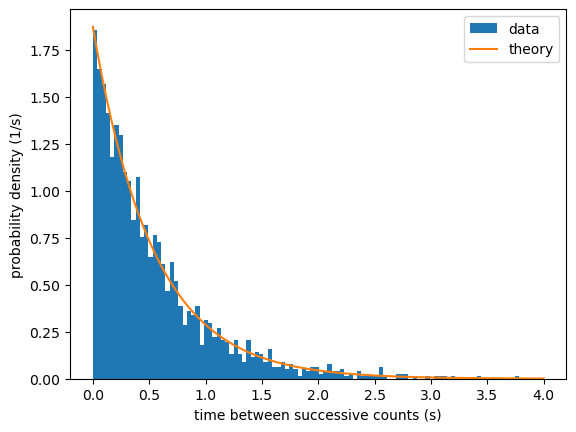

In [6]:
plt.hist(tb_s, bins=100, density=True, label="data")
ax = plt.gca()
ts = np.linspace(0,4,100)
ax.plot(ts, np.exp(-ts*R)*R, label="theory")
ax.legend()
ax.set_xlabel("time between successive counts (s)")
ax.set_ylabel("probability density (1/s)")